### Pair Programming – EDA III

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.
- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?
- ¿Qué edad recibe mayor número de ataques?

    💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.
- Ataques entre sexos, ¿hay diferencia?
- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [113]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex as re
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv("datos/attacks_pandas_8.csv")

In [115]:
# Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

plt.rcParams["figure.figsize"] = (10, 6)

In [116]:
df["country"].value_counts()

usa                   741
australia             343
south africa          234
bahamas                29
new zealand            21
                     ... 
greenland               1
st. maartin             1
united kingdom          1
sweden                  1
ceylon (sri lanka)      1
Name: country, Length: 95, dtype: int64

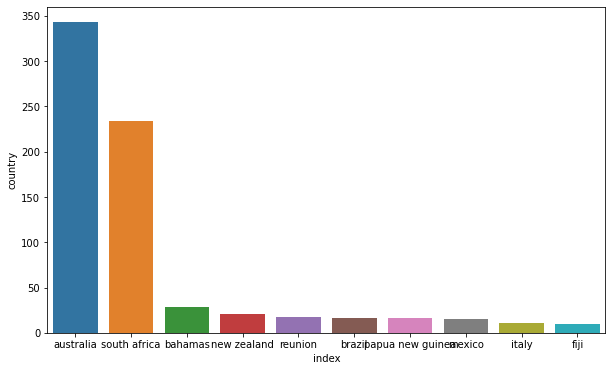

In [117]:
# Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para
# hacer una primera aproximación a nuestras hipótesis:
# ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no,
# seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

df_country = df["country"].value_counts()
df_country_10 = df_country[1:11].reset_index()

sns.barplot(x = "index", y = "country", data = df_country_10);

In [118]:
df_country_10.head(2)

,index,country
0,australia,343
1,south africa,234


In [119]:
df_filtrado_10 = df[df["country"].isin(["usa", "australia", "south africa", "bahamas", "new zealand", "reunion", "brazil", "papua new guinea", "mexico", "italy"])]

In [120]:
df_filtrado_10.head(2)

,Unnamed: 0,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
0,0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",57.0,White Shark,25-Jun-2018,Jun,N,F,usa
1,1,2018.06.03.a,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",18.0,Tiger Shark,03-Jun-2018,Jun,Y,M,brazil


<AxesSubplot:xlabel='country', ylabel='Count'>

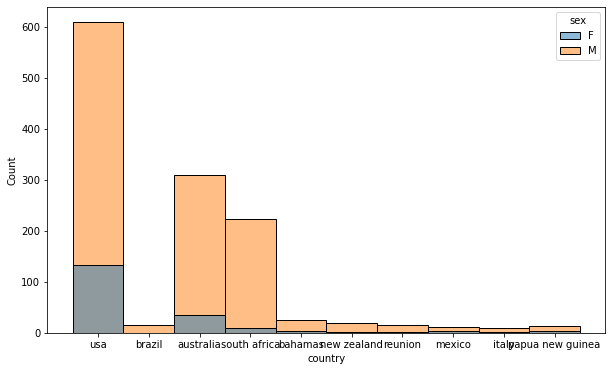

In [121]:
# Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

sns.histplot(x = "country", data = df_filtrado_10, hue = "sex")

In [122]:
# ¿Qué edad recibe mayor número de ataques? Para que esta gráfica nos salga legible
# tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut()
# que aprendimos en la lección de Limpieza II.

In [123]:
df["age_bins"] = pd.cut(df["age"], 3, labels = ["Jóvenes", "Adultos", "Mayores"]) 

In [124]:
df["age_bins"].value_counts()

Jóvenes    1003
Adultos     445
Mayores      66
Name: age_bins, dtype: int64

In [125]:
df["age"].max()

84.0

El grupo de edad más afectado son los jóvenes.

Rangos de edad:

- 0-28: Jóvenes

- 29-56 Adultos

- 57-84: Mayores

In [126]:
# Ataques entre sexos, ¿hay diferencia?

In [127]:
df.groupby(["sex"])["age_bins"].value_counts()

sex  age_bins
F    Jóvenes     129
     Adultos      61
     Mayores      19
M    Jóvenes     874
     Adultos     384
     Mayores      47
Name: age_bins, dtype: int64

Hay diferencia. Los hombres jóvenes son atacados casi seis veces más que las mujeres jóvenes. Lo mismo sucede para los adultos, aunque en el caso de los mayores, los hombres suponen tan sólo el doble.

In [128]:
# ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para
# que os salga mejor.

<AxesSubplot:xlabel='mes', ylabel='Count'>

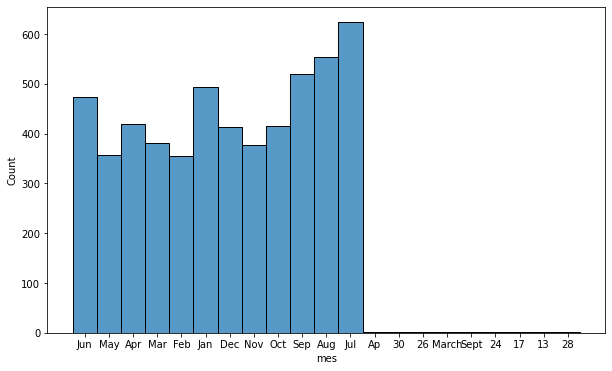

In [181]:
sns.histplot(x = "mes", data = df)

In [148]:
# Decidimos limpiar la columna mes:

patron_mes = "[0-9]+"

In [160]:
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [177]:
def limpia(data, col):
    for i in data[col]:
        if i not in meses:
            return np.nan

In [179]:
limpia(df, "mes")

nan

In [180]:
df["mes"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', nan, 'Ap', '30', '26', 'March', 'Sept', '24',
       '17', '13', '28'], dtype=object)

def num(col):
    try:
        return re.findall(patron_mes, "holi")[0]
    except: 
        return np.nan